In [1]:
!pip install wooldridge

   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------- ----------------------------- 1.3/5.1 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 2.6/5.1 MB 6.3 MB/s eta 0:00:01
   -------------------------------- ------- 4.2/5.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 6.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import wooldridge as woo

# carregar o dataset
df = woo.data('bwght')

# ver primeiras linhas
df


,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110,12.0,12.0,4,1,1,0,4.700480,6.8750,0.0,3.314186
1384,5.5,30.0,138.300003,146,NaN,16.0,2,1,1,0,4.983607,9.1250,0.0,1.704748
1385,65.0,8.0,118.599998,135,18.0,16.0,2,0,1,0,4.905275,8.4375,0.0,4.174387
1386,27.5,8.0,118.599998,118,NaN,14.0,2,0,1,0,4.770685,7.3750,0.0,3.314186


In [17]:
# variável binária: 1 se baixo peso (<2500 g / 5.51 lb), 0 caso contrário
df['low_bw'] = (df['bwghtlbs'] < 5.51).astype(int)

# verificar distribuição
print(df['low_bw'].value_counts())


low_bw
0    1124
1      67
Name: count, dtype: int64


In [19]:
import statsmodels.api as sm

df = df.dropna()

# variável dependente
y = df['low_bw']

# variáveis independentes que você quer testar
X = df[['cigs']]

# adiciona constante (intercepto)
X = sm.add_constant(X)

# modelo logit
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())


Optimization terminated successfully.
         Current function value: 0.214735
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 low_bw   No. Observations:                 1191
Model:                          Logit   Df Residuals:                     1189
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Sep 2025   Pseudo R-squ.:                0.008320
Time:                        10:05:35   Log-Likelihood:                -255.75
converged:                       True   LL-Null:                       -257.90
Covariance Type:            nonrobust   LLR p-value:                   0.03831
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9123      0.137    -21.330      0.000      -3.180      -2.645
cigs           0.0390      0.

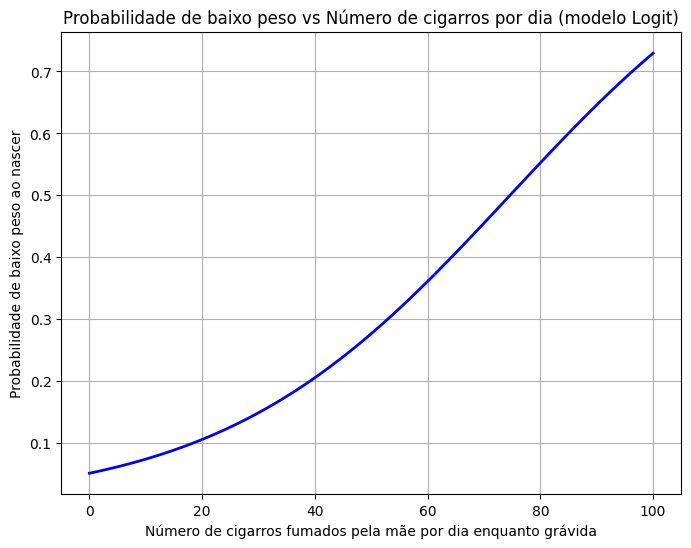

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# suposição: logit_model já está rodado

# gerar uma sequência de valores de cigarro (0 a 30)
cigs_range = np.linspace(0, 100, 100)

# criar dataframe com constante
X_plot = sm.add_constant(pd.DataFrame({'cigs': cigs_range}))

# calcular probabilidades previstas
pred_probs = logit_model.predict(X_plot)

# plot
plt.figure(figsize=(8,6))
plt.plot(cigs_range, pred_probs, color='blue', lw=2)
plt.xlabel('Número de cigarros fumados pela mãe por dia enquanto grávida')
plt.ylabel('Probabilidade de baixo peso ao nascer')
plt.title('Probabilidade de baixo peso vs Número de cigarros por dia (modelo Logit)')
plt.grid(True)
plt.show()


In [24]:
X_plot

,const,cigs
0,1.0,0.000000
1,1.0,1.010101
2,1.0,2.020202
3,1.0,3.030303
4,1.0,4.040404
...,...,...
95,1.0,95.959596
96,1.0,96.969697
97,1.0,97.979798
98,1.0,98.989899
